In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from main.draw_tools.stacking import make_dict_data, make_dict_data_list

In [48]:

# base_file_loc =  '/media/jykim/T7/storage/01_recon/v2new_correct_test_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage_b2/storage/MC15ri_skim_check/v2new_correct_test_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage_b2/storage/pi0calib_23_hadrom_prompt_4S_v1/'

base_filter = '  D0_M>1.67 && D0_M<2.06 '
base_filter = 'kshort_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06  && abs(Dstarp_Q-0.00593)<0.0006'

#base_filter = ' Pis_charge==-1 && D0_M>1.67 && D0_M<2.06 && Dstarp_CMS_p>2.52 && abs(Dstarp_Q-0.00593)<0.001 '
# base_filter = 'abs(D0_cosHel_0)<0.5 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && Dstarp_CMS_p>2.5 && abs(Dstarp_Q-0.00593)<0.0006 && Pi0_Prob<0.85'
# base_filter = ' Dstarp_isSignal!=1 && rho_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.90 && Dstarp_CMS_p>2.73 && abs(D0_cosHel_0)<0.8'

tree = 'phi'
tree = 'kshort'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E','gamma_cosTheta','gamma_p']
var = 'D0_M'

In [49]:
phigamma_0 = base_file_loc + 'sub00/output_*.root'
phigamma_1 = base_file_loc + 'sub01/output_*.root'
phigamma_2 = base_file_loc + 'sub02/output_*.root'
phigamma_3 = base_file_loc + 'sub03/output_*.root'
#phigamma_4 = base_file_loc + 'sub04/output_*.root'

#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_phigamma_0 = get_pd(file=phigamma_0, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_1 = get_pd(file=phigamma_1, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_2 = get_pd(file=phigamma_2, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_3 = get_pd(file=phigamma_3, tree=tree,base_filter=base_filter,variables=variables)
#pd_phigamma_4 = get_pd(file=phigamma_4, tree=tree,base_filter=base_filter,variables=variables)



In [50]:
pd_merged_phigamma = pd.concat([pd_phigamma_0, pd_phigamma_1, pd_phigamma_2, pd_phigamma_3,])
#pd_merged_phigamma = pd.concat([pd_phigamma_0, pd_phigamma_1, pd_phigamma_2, pd_phigamma_3, pd_phigamma_4])

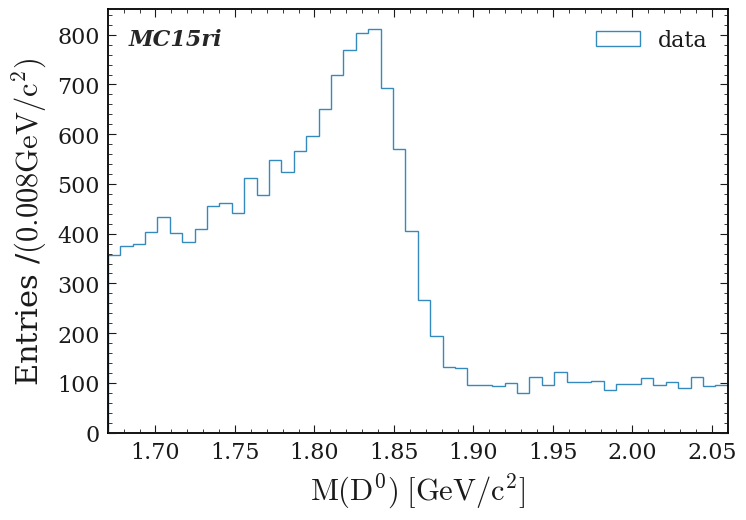

<Figure size 800x550 with 0 Axes>

In [51]:

var = 'D0_M'
#     for labeling in labels:
xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)
# plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
plt.hist(pd_merged_phigamma[var], bins=xbins, histtype='step', stacked=True,label='data')

#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

ax = plt.gca()

# Shrink current axis by 20%
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend()

#     DRAW(pd_Dtokshortpi0, cut)

watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

n, xe = np.histogram(pd_merged_phigamma[var], bins=50, range=(1.67,2.06))

ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.show()
plt.clf()

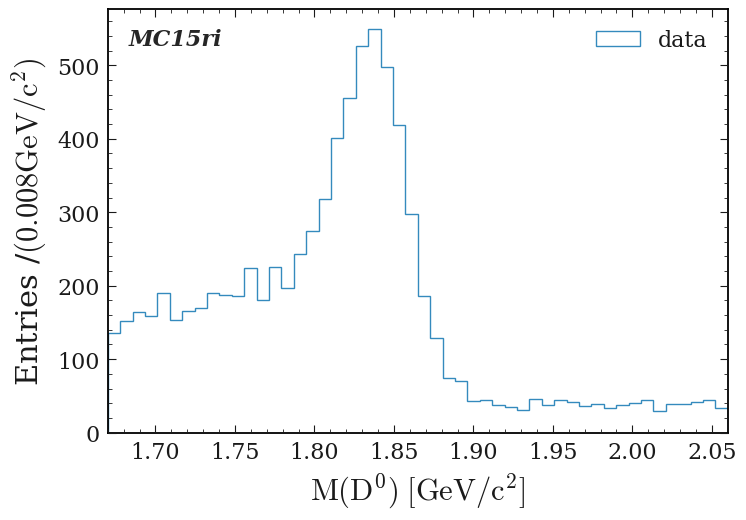

<Figure size 800x550 with 0 Axes>

In [53]:

var = 'D0_M'
#     for labeling in labels:
xrange=(1.67,2.06)
xbins = np.linspace(*xrange,51)
# plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
plt.hist(pd_merged_phigamma.query('Pi0_Prob<0.8')[var], bins=xbins, histtype='step', stacked=True,label='data')

#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

ax = plt.gca()

# Shrink current axis by 20%
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.legend()

#     DRAW(pd_Dtokshortpi0, cut)

watermark(t="",logo="MC15ri")
ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

n, xe = np.histogram(pd_merged_phigamma[var], bins=50, range=(1.67,2.06))

ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.show()
plt.clf()

In [54]:
x1=pd_merged_phigamma['gamma_cosTheta']
y1=pd_merged_phigamma['gamma_p']

x2=pd_merged_phigamma.query('Pi0_Prob<0.8')['gamma_cosTheta']
y2=pd_merged_phigamma.query('Pi0_Prob<0.8')['gamma_p']

In [55]:
yedge = np.linspace(0.3, 4.3, 6)
xedge = np.linspace(-1, 1, 11)

h1, xedges, yedges = np.histogram2d(x1, y1, bins=(xedge, yedge))
h2, xedges, yedges = np.histogram2d(x2, y2, bins=(xedge, yedge))
h_kshort_random = h2 / h1

/tmp/ipykernel_16008/1277290709.py:6: RuntimeWarning: invalid value encountered in true_divide
  h_kshort_random = h2 / h1


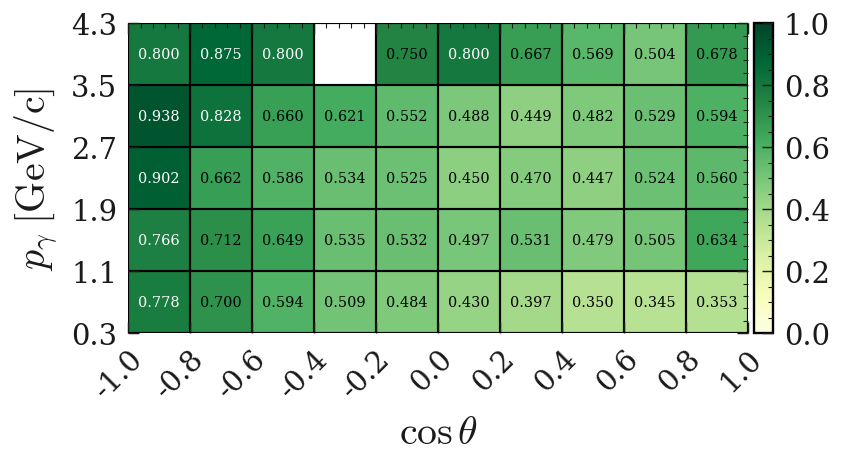

In [56]:
draw_2D_grid(h_kshort_random)

In [32]:
def draw_2D_grid(numpy_data):

    fig, ax = plt.subplots(dpi=130, figsize=(6.4, 4.4 / 0.8))
    z = np.flip(numpy_data, axis=1)
    z = np.transpose(z)

    #im = ax.imshow(z, vmin=0, vmax=1, cmap=plt.get_cmap("Reds"))
    im = ax.imshow(z, vmin=0, vmax=1, cmap=cm.YlGn)


    # We want to show all ticks...
    xbin_edges = xedge
    ybin_edges = yedge[::-1]
    ax.set_xticks(np.arange(len(xbin_edges)) - 0.5)
    # ax.set_yticks(np.arange(len(ybin_edges)) - 0.5)
    # ax.set_xticks(np.arange(len(xbin_edges)) + 0.5 )
    ax.set_yticks(np.arange(len(ybin_edges)) - 0.5 )

    # ax.set_yticks(np.arange(len(ybin_edges)) + 0.5 )
    # ... and label them with the respective list entries
    ax.set_xticklabels([f"{x:.1f}" for x in xbin_edges])
    ax.set_yticklabels([f"{y:.1f}" for y in ybin_edges])

    ax.set_xlabel(r"$\cos\theta$")
    ax.set_ylabel(r"$p_\gamma \; [\mathrm{GeV/c}]$")
    
    ax.grid(ls='-', lw=2)

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = ax.figure.colorbar(im, ax=ax, cax=cax)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    # ax.set_xticks(np.arange(z[1]+1)-.5, minor=True)
    # ax.set_yticks(np.arange(z[0]+1)-.5, minor=True)
    ax.grid(which="major", color="black", linestyle='-', linewidth=1.2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ybin_edges)-1):
        for j in range(len(xbin_edges)-1):

    #     t = "%.1f%%"%(zval * 100,) # format value with 1 decimal point
            c = 'w' if z[i,j] > 0.75 else 'black' # if dark-green, change text color to white

            input_text = None if math.isnan(z[i, j]) ==True else f"{z[i, j]:.3f}"
            text = ax.text(j, i, input_text,
                            ha="center", va="center", color=c, fontsize=8)

In [18]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/v9mask_pi0calib_sigext/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
tree = 'kshort'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Pi0_Prob','gamma_E']
var = 'D0_M'

In [21]:
phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'
#base_filter=' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = base_filter
varaiables = variables
tree=tree

pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)


In [22]:
def Draw(var, xrange:tuple, pd_ccbar, pd_uubar, pd_ddbar, pd_ssbar, pd_charged, pd_mixed, pd_taupair):

    var = var
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    colors=b2helix(7)


    var = var
    data_list=dict()
    #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    mixed_bkg = {var : pd_mixed[var] }
    charged_bkg = {var : pd_charged[var] }
    ccbar_bkg = {var : pd_ccbar[var] }
    uubar_bkg = {var : pd_uubar[var] }
    ddbar_bkg = {var : pd_ddbar[var] }
    ssbar_bkg = {var : pd_ssbar[var] }
    taupair_bkg = {var : pd_taupair[var] }

    #print(mixed_bkg)
    #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

    #     for labeling in labels:
    xrange=xrange
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

    #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()

    #     DRAW(pd_Dtokshortpi0, cut)

    watermark(t="",logo="MC15ri")
    ax=plt.gca()
    #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
    #     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

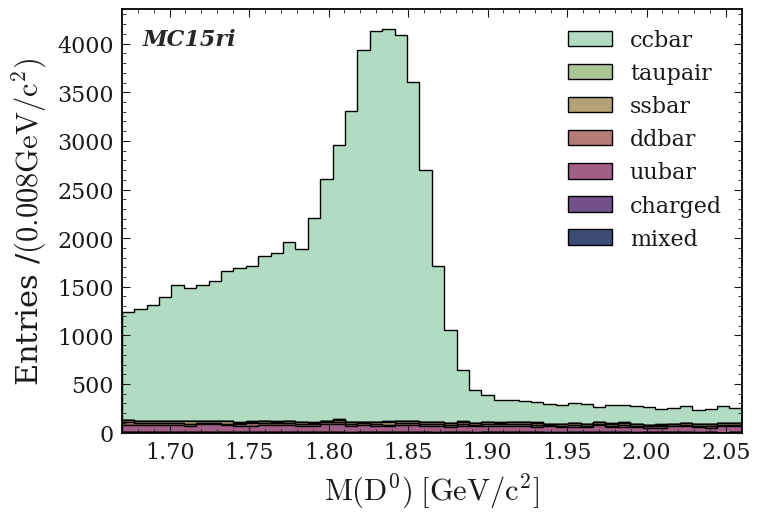

<Figure size 800x550 with 0 Axes>

In [23]:
Draw("D0_M", (1.67,2.06), pd_phigamma_ccbar, pd_phigamma_uubar, pd_phigamma_ddbar, pd_phigamma_ssbar, pd_phigamma_charged, pd_phigamma_mixed, pd_phigamma_taupair)